In [1]:
import sys
sys.path.insert(0,'C:/Users/cvikas10/Documents/Python Programs')

from nlp_modules import *

pd.options.mode.chained_assignment = None
path = 'C:/Users/cvikas10/Desktop/New folder'

df = pd.read_csv(os.path.join(path,'new_scores_ppm.csv'),
                 converters={'sat2':str,
                             'sat1_oe':str,
                             'cleaned':str,
                             'bagofwords':str,
                             'polarity_compound':float,
                             'polarity_positive':float,
                             'polarity_negative':float,
                             'polarity_neutral':float,
                             'subjectivity':float,
                             'rptqtr':str,
                             'region':str,
                             'healthplan':str})

df = df[df['sat2']!='']
df.reset_index(drop=True,inplace=True)
parent_df = df

parent_df['sat2'] = parent_df['sat2'].astype(int)
detract_df = parent_df[parent_df['sat2']<7]
promo_df = parent_df[parent_df['sat2']>=7]

print (detract_df.shape)
print (promo_df.shape)
#Quarter wise analysis

C:\Anaconda\lib\site-packages\gensim\utils.py:1167: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


(2217, 16)
(2724, 16)


In [2]:
df.shape

(4941, 16)

In [3]:
parent_df['rptqtr'].value_counts()

201702    718
201704    650
201703    627
201701    587
201604    568
201801    530
201802    529
201803    503
201603    229
Name: rptqtr, dtype: int64

In [4]:
parent_df.columns

Index(['sat2', 'sat1_oe', 'comment_length', 'word_count', 'avg_word_length',
       'cleaned', 'bagofwords', 'polarity', 'polarity_compound',
       'polarity_positive', 'polarity_negative', 'polarity_neutral',
       'subjectivity', 'rptqtr', 'region', 'healthplan'],
      dtype='object')

In [5]:
parent_df.shape

(4941, 16)

In [6]:
parent_df.dtypes

sat2                   int32
sat1_oe               object
comment_length         int64
word_count             int64
avg_word_length      float64
cleaned               object
bagofwords            object
polarity              object
polarity_compound    float64
polarity_positive    float64
polarity_negative    float64
polarity_neutral     float64
subjectivity         float64
rptqtr                object
region                object
healthplan            object
dtype: object

In [7]:
parent_df.head(10)

,sat2,sat1_oe,comment_length,word_count,avg_word_length,cleaned,bagofwords,polarity,polarity_compound,polarity_positive,polarity_negative,polarity_neutral,subjectivity,rptqtr,region,healthplan
0,10,Always welcome new patients.,28,4,6.250000,always welcome new patients,always welcome new patients,"{'neg': 0.0, 'neu': 0.5, 'pos': 0.5, 'compound...",0.4588,0.500,0.000,0.500,0.677273,201603,Central,"UnitedHealthcare of the Midlands, Inc. (IA)"
1,2,Intrusive requirements. Inability to use our ...,98,15,5.600000,intrusive requirements inability to use our l...,intrusive requirements inability use lab patie...,"{'neg': 0.184, 'neu': 0.816, 'pos': 0.0, 'comp...",-0.4019,0.000,0.184,0.816,0.000000,201603,Southeast,"UnitedHealthcare of Florida, Inc. - North Florida"
2,3,"I want our schedules full, so if there are ope...",267,49,4.469388,i want our schedules full so if there are open...,want schedules full openings would soon see fi...,"{'neg': 0.073, 'neu': 0.9, 'pos': 0.027, 'comp...",-0.4939,0.027,0.073,0.900,0.568000,201603,West,UnitedHealthcare of Utah
3,5,Neutral in feelings.,20,3,6.000000,neutral in feelings,neutral feelings,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.000,0.000,1.000,0.000000,201603,Central,"UnitedHealthcare of the Midlands, Inc. (IA)"
4,8,We are currently accepting new patients and co...,73,12,5.166667,we are currently accepting new patients and co...,currently accepting new patients continue see ...,"{'neg': 0.0, 'neu': 0.809, 'pos': 0.191, 'comp...",0.3818,0.191,0.000,0.809,0.436364,201603,Southeast,"UnitedHealthcare of Florida, Inc. - North Florida"
5,6,Billing and authorizations consume a lot of time.,49,8,5.250000,billing and authorizations consume a lot of time,billing authorizations consume lot time,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.000,0.000,1.000,0.000000,201603,Central,United HealthCare Insurance Company - Michigan
6,3,It would depend on their other choices before ...,86,16,4.437500,it would depend on their other choices before ...,would depend choices would hope uhc insurers,"{'neg': 0.0, 'neu': 0.838, 'pos': 0.162, 'comp...",0.4404,0.162,0.000,0.838,0.375000,201603,Central,UnitedHealthcare Dallas
7,0,We have a huge issue with the new infertility ...,663,115,4.773913,we have a huge issue with the new infertility ...,huge issue new infertility pa process subseque...,"{'neg': 0.075, 'neu': 0.857, 'pos': 0.068, 'co...",0.0469,0.068,0.075,0.857,0.384091,201603,Southeast,UnitedHealthcare of Arkansas
8,1,1. It is very difficult to speak with a live p...,258,53,3.886792,1 it is very difficult to speak with a live pe...,1 difficult speak live person uhc collectively...,"{'neg': 0.241, 'neu': 0.759, 'pos': 0.0, 'comp...",-0.8930,0.000,0.241,0.759,0.833333,201603,Southeast,UnitedHealthcare of Louisiana
9,3,We have noticed very poor claim processing of ...,452,76,4.960526,we have noticed very poor claim processing of ...,noticed poor claim processing maternity claims...,"{'neg': 0.158, 'neu': 0.789, 'pos': 0.053, 'co...",-0.8221,0.053,0.158,0.789,0.670000,201603,Northeast,"UnitedHealthcare of New Jersey, Inc."


In [5]:
#Segmenting the complete data frame based on the quarter
df_q1 = df[df['rptqtr']=='201603']
df_q2 = df[df['rptqtr']=='201604']
df_q3 = df[df['rptqtr']=='201701']
df_q4 = df[df['rptqtr']=='201702']
df_q5 = df[df['rptqtr']=='201703']
df_q6 = df[df['rptqtr']=='201704']
df_q7 = df[df['rptqtr']=='201801']
df_q8 = df[df['rptqtr']=='201802']
df_q9 = df[df['rptqtr']=='201803']

df_q1['sat2']=df_q1['sat2'].astype(int)
df_q2['sat2']=df_q2['sat2'].astype(int)
df_q3['sat2']=df_q3['sat2'].astype(int)
df_q4['sat2']=df_q4['sat2'].astype(int)
df_q5['sat2']=df_q5['sat2'].astype(int)
df_q6['sat2']=df_q6['sat2'].astype(int)
df_q7['sat2']=df_q7['sat2'].astype(int)
df_q8['sat2']=df_q8['sat2'].astype(int)
df_q9['sat2']=df_q9['sat2'].astype(int)

print (df_q1.shape)
print (df_q2.shape)
print (df_q3.shape)
print (df_q4.shape)
print (df_q5.shape)
print (df_q6.shape)
print (df_q7.shape)
print (df_q8.shape)
print (df_q9.shape)

(229, 16)
(568, 16)
(587, 16)
(718, 16)
(627, 16)
(650, 16)
(530, 16)
(529, 16)
(503, 16)


In [6]:
health_plans = pd.Categorical(df['healthplan']).categories
regions = pd.Categorical(df['region']).categories
print (health_plans)
print (regions)
print (len(health_plans))
print (len(regions))

Index(['Neighborhood Health Partnership',
       'Nevada - United HealthCare Insurance Company', 'Oxford CT',
       'Oxford NJ', 'Oxford NY',
       'United HealthCare Insurance Company - Connecticut',
       'United HealthCare Insurance Company - Indiana',
       'United HealthCare Insurance Company - Michigan',
       'United Healthcare of Texas, Inc. - Houston',
       'UnitedHealthcare - Central Texas', 'UnitedHealthcare - Cleveland',
       'UnitedHealthcare Dallas', 'UnitedHealthcare of Alabama',
       'UnitedHealthcare of Arizona', 'UnitedHealthcare of Arkansas',
       'UnitedHealthcare of California', 'UnitedHealthcare of Colorado, Inc.',
       'UnitedHealthcare of Florida, Inc. - North Florida',
       'UnitedHealthcare of Florida, Inc. - South Florida',
       'UnitedHealthcare of Georgia', 'UnitedHealthcare of Illinois',
       'UnitedHealthcare of Kentucky', 'UnitedHealthcare of Louisiana',
       'UnitedHealthcare of Mississippi',
       'UnitedHealthcare of New Englan

In [7]:
#Segmenting the data frame based on healthplan and region

healthplan_df = []
regions_df = []

for plan in health_plans:
    plan_sub = df[df['healthplan']==plan]
    healthplan_df.append(plan_sub)
    
for region in regions:
    reg_sub = df[df['region']==region]
    regions_df.append(reg_sub)

for i in range(len(healthplan_df)):
    healthplan_df[i]['sat2'] = healthplan_df[i]['sat2'].astype(int)
    
for i in range(len(regions_df)):
    regions_df[i]['sat2'] = regions_df[i]['sat2'].astype(int)
    
print (len(healthplan_df))
print (len(regions_df))

45
4


In [14]:
#Topic modelling

#First tokenizing the data sentence wise and then after that word wise to avoid missing characters like punctuation
def tokenize_only(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word.lower() for sent in nltk.sent_tokenize(str(text)) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    return filtered_tokens


#Topic modeling using sklearn LDA
def topic_modeling_lda(file):
    word_list = tokenize_only(file['bagofwords'].tolist())
    np.random.shuffle(word_list)
    train_set = word_list[:round(0.70*len(word_list))]
    test_set = word_list[round(0.70*len(word_list)):]
    stop_words = stopwords.words('english')

    filtered_words = [word for word in word_list if word.lower().strip() not in stop_words]
    
    filtered_words_test = [word for word in test_set if word.lower().strip() not in stop_words]
    
    tfidf_vect = TfidfVectorizer(norm='l2', min_df=0, use_idf=True, 
                                 smooth_idf=False, sublinear_tf=False)
    count_vect = CountVectorizer(max_df=0.80,max_features=50000)
    
    X = tfidf_vect.fit_transform(filtered_words)
    _X_ = count_vect.fit_transform(filtered_words)
    
    dense_matrix = _X_.todense()
    
    print("Sparsity: ", ((dense_matrix > 0).sum()/dense_matrix.size)*100, "%")
    
    n_components = 20
    lda = LatentDirichletAllocation(n_components=n_components,
                                    learning_method='batch', 
                                    max_iter=25,random_state=0)
    document_topics = lda.fit_transform(X).T
    sorting = np.argsort(lda.components_,axis=1)[:,::-1]
    feature_names = np.array(count_vect.get_feature_names())
    mglearn.tools.print_topics(topics=range(n_components),feature_names=feature_names,
                               sorting=sorting,topics_per_chunk=5,n_words=10)
    # Log Likelyhood: Higher the better
    print("Log Likelihood using tf-idf: ", lda.score(X))
    print("Perplexity using tf-idf: ", lda.perplexity(X))
    
    return lda, feature_names

In [15]:
lda_q1,feature_namesq1 = topic_modeling_lda(df_q1)

Sparsity:  0.09250693802035154 %
topic 0       topic 1       topic 2       topic 3       topic 4       
--------      --------      --------      --------      --------      
claims        care          customer      would         unitedhealthcare
work          phone         problems      getting       get           
difficult     authorizationsprior         network       rather        
process       calls         office        higher        denied        
good          rates         appeal        paid          experience    
plan          come          appeals       information   without       
denial        four          aarp          online        needs         
seems         records       continue      often         take          
generally     additional    anyone        use           reviews       
back          private       ok            eligibility   matter        


topic 5       topic 6       topic 7       topic 8       topic 9       
--------      --------      --------    

In [13]:
lda_q2,feature_namesq2 = topic_modeling_lda(df_q2)

Sparsity:  0.06069877061337766 %
topic 0       topic 1       topic 2       topic 3       topic 4       
--------      --------      --------      --------      --------      
like          insurance     time          difficult     patients      
paid          reimbursement service       deal          getting       
process       see           authorization plan          well          
much          many          payment       referrals     area          
company       providers     hard          optum         go            
easier        less          office        coverage      without       
best          low           accept        denied        give          
several       year          physician     peer          little        
working       questions     happy         overall       generally     
love          insurers      know          deny          require       


topic 5       topic 6       topic 7       topic 8       topic 9       
--------      --------      --------      

In [14]:
lda_q3,feature_namesq3 = topic_modeling_lda(df_q3)

Sparsity:  0.07183908045977011 %
topic 0       topic 1       topic 2       topic 3       topic 4       
--------      --------      --------      --------      --------      
low           reimbursement physician     get           like          
providers     paid          want          difficult     always        
better        open          response      plans         authorizations
still         happy         medicine      us            take          
needs         appropriate   continue      staff         part          
overall       insurances    eligibility   billing       filing        
several       love          correct       information   problem       
primary       limited       panel         general       healthcare    
payer         denied        except        paperwork     two           
carrier       know          based         however       right         


topic 5       topic 6       topic 7       topic 8       topic 9       
--------      --------      --------      

In [15]:
lda_q4,feature_namesq4 = topic_modeling_lda(df_q4)

Sparsity:  0.06760205795037814 %
topic 0       topic 1       topic 2       topic 3       topic 4       
--------      --------      --------      --------      --------      
practice      patients      reimbursement accept        patient       
physician     paid          poor          welcome       authorizations
even          customer      claim         pays          us            
contracted    help          service       referral      medicare      
problem       schedule      one           benefits      commercial    
sometimes     physicians    need          told          surgery       
access        happy         years         rather        seeing        
several       rates         members       manner        address       
per           contract      representativeothers        multiple      
credentialed  person        able          separate      administrative


topic 5       topic 6       topic 7       topic 8       topic 9       
--------      --------      --------      

In [16]:
lda_q5,feature_namesq5 = topic_modeling_lda(df_q5)

Sparsity:  0.07060852510893517 %
topic 0       topic 1       topic 2       topic 3       topic 4       
--------      --------      --------      --------      --------      
unitedhealthcarepractice      good          claim         patients      
problems      process       time          us            service       
call          need          deal          insurances    open          
representativescoverage      prior         problem       denied        
health        great         due           benefits      contract      
without       getting       business      taking        receive       
experience    relationship  years         love          group         
frustrating   rate          eligibility   obtain        code          
usually       easier        slow          state         reimbursements
manner        know          doctor        delays        someone       


topic 5       topic 6       topic 7       topic 8       topic 9       
--------      --------      --------   

In [17]:
lda_q6,feature_namesq6 = topic_modeling_lda(df_q6)

Sparsity:  0.07604562737642585 %
topic 0       topic 1       topic 2       topic 3       topic 4       
--------      --------      --------      --------      --------      
time          low           uhc           poor          patients      
customer      payments      plans         network       great         
getting       fee           coverage      open          us            
needs         preauthorizationaccept        staff         take          
require       experience    phone         usually       issue         
physician     formulary     healthcare    approval      quality       
excellent     provide       manner        person        rep           
system        carriers      satisfied     resolution    another       
specialists   calls         problem       willing       others        
efficient     pleased       give          way           complex       


topic 5       topic 6       topic 7       topic 8       topic 9       
--------      --------      --------    

In [18]:
lda_q7,feature_namesq7 = topic_modeling_lda(df_q7)

Sparsity:  0.08208187377888762 %
topic 0       topic 1       topic 2       topic 3       topic 4       
--------      --------      --------      --------      --------      
prior         good          company       uhc           like          
well          see           experience    care          service       
getting       coverage      seeing        accepting     pay           
paid          us            needed        pts           network       
timely        services      support       referrals     even          
better        billing       questions     trying        satisfied     
years         overall       usually       verify        though        
plans         staff         past          rather        manner        
fairly        increase      paying        days          use           
denials       pays          policy        neutral       user          


topic 5       topic 6       topic 7       topic 8       topic 9       
--------      --------      --------      

In [19]:
lda_q8,feature_namesq8 = topic_modeling_lda(df_q8)

Sparsity:  0.07487469415872866 %
topic 0       topic 1       topic 2       topic 3       topic 4       
--------      --------      --------      --------      --------      
time          united        healthcare    difficult     good          
timely        reimbursement years         get           one           
much          would         hospital      pay           low           
rate          prior         needed        open          take          
reason        medicare      seems         denied        company       
seen          insurances    people        working       never         
takes         even          room          online        well          
every         speak         clinical      request       welcome       
contracted    know          easiest       support       talk          
taking        doctors       happy         english       sometimes     


topic 5       topic 6       topic 7       topic 8       topic 9       
--------      --------      --------      

In [20]:
lda_q9,feature_namesq9 = topic_modeling_lda(df_q9)

Sparsity:  0.08390166479320388 %
topic 0       topic 1       topic 2       topic 3       topic 4       
--------      --------      --------      --------      --------      
issues        like          insurance     patients      uhc           
paid          payment       many          reimbursementsdifficult     
claim         commercial    due           plan          poor          
payments      insurances    find          accept        usually       
services      companies     auths         often         medicare      
unitedhealthcarerates         difficulty    seems         providers     
payer         every         day           slow          different     
fair          billing       procedures    experience    call          
quality       issue         understand    takes         make          
problem       online        take          reasonable    processes     


topic 5       topic 6       topic 7       topic 8       topic 9       
--------      --------      --------    

In [21]:
#Topic modeling on Detractors
detractors_lda, detractors_features = topic_modeling_lda(detract_df)

Sparsity:  0.02843273457250038 %
topic 0       topic 1       topic 2       topic 3       topic 4       
--------      --------      --------      --------      --------      
issues        many          always        uhc           time          
claim         providers     like          prior         customer      
contract      companies     call          company       office        
find          commercial    denials       need          optum         
rate          experience    good          medical       want          
referral      requires      well          take          lower         
open          appeal        insurances    reimbursementssystem        
precertificationthree         etc           number        makes         
day           terrible      community     reason        days          
deny          administrativeobtain        private       contact       


topic 5       topic 6       topic 7       topic 8       topic 9       
--------      --------      --------    

In [22]:
#Topic Modeling on promoters
detractors_lda, detractors_features = topic_modeling_lda(promo_df)

Sparsity:  0.04332282262579855 %
topic 0       topic 1       topic 2       topic 3       topic 4       
--------      --------      --------      --------      --------      
issues        always        uhc           would         great         
deal          patient       payments      health        well          
plan          get           excellent     seeing        services      
happy         welcome       paid          business      claim         
commercial    authorizationspopulation    referral      relationship  
physician     difficult     providing     treat         regardless    
fee           help          filing        pleased       able          
use           grow          takes         available     friendly      
fast          procedures    treatment     regarding     user          
verify        payers        several       easiest       policies      


topic 5       topic 6       topic 7       topic 8       topic 9       
--------      --------      --------      

In [23]:
lda_central,features_central = topic_modeling_lda(regions_df[0])

Sparsity:  0.03878036844683849 %
topic 0       topic 1       topic 2       topic 3       topic 4       
--------      --------      --------      --------      --------      
patients      time          plans         getting       new           
unitedhealthcarelike          network       physician     medical       
take          processing    health        great         commercial    
know          rep           provide       happy         schedule      
seeing        dealing       find          never         optum         
surgery       takes         filing        phone         records       
eob           carriers      year          community     high          
administrativepreauthorizationunderstand    way           credentialing 
amount        needed        friendly      regardless    correct       
support       contracted    excellent     correctly     requires      


topic 5       topic 6       topic 7       topic 8       topic 9       
--------      --------      --------  

In [24]:
lda_northeast,features_northeast = topic_modeling_lda(regions_df[1])

Sparsity:  0.053593239367606293 %
topic 0       topic 1       topic 2       topic 3       topic 4       
--------      --------      --------      --------      --------      
reimbursement service       authorizationsnew           patients      
time          payments      schedule      easy          difficult     
accepting     getting       lot           medicare      need          
services      information   lowest        representativesprocess       
long          physician     use           back          us            
rate          system        excellent     prompt        preauthorization
doctor        never         eligibility   open          lower         
access        needed        average       covered       area          
issue         online        advantage     know          seeing        
enjoy         go            physicians    experience    schedules     


topic 5       topic 6       topic 7       topic 8       topic 9       
--------      --------      --------  

In [25]:
lda_southeast,features_southeast = topic_modeling_lda(regions_df[2])

Sparsity:  0.04786110162417422 %
topic 0       topic 1       topic 2       topic 3       topic 4       
--------      --------      --------      --------      --------      
claims        plans         new           difficult     office        
medicaid      services      see           help          experience    
seems         us            prior         times         several       
lower         ease          need          business      online        
payer         rates         coverage      staff         continue      
overall       problem       physician     regarding     consuming     
referral      send          website       corrected     quality       
hospital      rating        procedures    fair          covered       
every         year          payers        worst         provided      
private       taking        impossible    become        cumbersome    


topic 5       topic 6       topic 7       topic 8       topic 9       
--------      --------      --------      

In [26]:
lda_west,features_west = topic_modeling_lda(regions_df[3])

Sparsity:  0.05307855626326964 %
topic 0       topic 1       topic 2       topic 3       topic 4       
--------      --------      --------      --------      --------      
insurance     issues        patients      getting       easy          
practice      timely        unitedhealthcarecompany       always        
reimbursement optum         prior         business      office        
accepting     services      poor          companies     rates         
often         provide       number        medicare      processing    
physicians    help          medications   needs         physician     
happy         private       policies      every         access        
issue         give          hospital      months        filing        
different     studies       treatment     difficulty    contracting   
make          except        questions     cost          department    


topic 5       topic 6       topic 7       topic 8       topic 9       
--------      --------      --------    

In [27]:
health_plans = health_plans.tolist()

for m in range(len(health_plans)):
    corpus = " ".join(c for c in healthplan_df[m][healthplan_df[m]['sat2']<7]['bagofwords'])
    rawText = corpus
     
    tokens = nltk.word_tokenize(rawText)
    text = nltk.Text(tokens)
    text_cn = [word for word in text]
    finder = BigramCollocationFinder.from_words(text_cn)
    bigram_measures = BigramAssocMeasures()
    scored = finder.score_ngrams(bigram_measures.raw_freq)
    scoredList = sorted(scored, key=itemgetter(1), reverse=True)
    word_dict = {}
     
    listLen = len(scoredList)
     
    # Get the bigram and make a contiguous string for the dictionary key. 
    # Set the key to the scored value. 
    for i in range(listLen):
        word_dict['_'.join(scoredList[i][0])] = scoredList[i][1]
    
    WC_height = 1000
    WC_width = 1000
    WC_max_words = 200
     
    wordCloud = WordCloud(max_words=WC_max_words, height=WC_height, width=WC_width)
    wordCloud.generate_from_frequencies(word_dict)
    plt.title('Most frequently occurring bigrams connected with an underscore_')
    plt.imshow(wordCloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()
    
    fname = "WordCloud_Bigrams_" + health_plans[m] + "_data.png"
    wordCloud.to_file(fname)

NameError: name 'BigramAssocMeasures' is not defined

In [28]:
priority_topics=['reimbursements',
                 'authorization',
                 'fee schedule',
                 'copay',
                 'aarp',
                 'precertification',
                 'bcbs',
                 'communication',
                 'timely filing',
                 'referral',
                 'paperwork',
                 'appeals',
                 'denials',
                 'time consuming',
                 'billing',
                 'credentialing',
                 'contracting',
                 'new patients']


rptqtrs = list(pd.Categorical(df['rptqtr']).categories)

def quarter_analysis(df_,topics):
    quarter_map = {}
    for topic in topics:
        new_data = df_[df_['bagofwords'].str.contains(topic)]
        q_201603 = new_data[new_data['rptqtr']=='201603']
        q_201604 = new_data[new_data['rptqtr']=='201604']
        q_201701 = new_data[new_data['rptqtr']=='201701']
        q_201702 = new_data[new_data['rptqtr']=='201702']
        q_201703 = new_data[new_data['rptqtr']=='201703']
        q_201704 = new_data[new_data['rptqtr']=='201704']
        q_201801 = new_data[new_data['rptqtr']=='201801']
        q_201802 = new_data[new_data['rptqtr']=='201802']
        q_201803 = new_data[new_data['rptqtr']=='201803']
        q1_score = q_201603.shape[0]/new_data.shape[0]
        q2_score = q_201604.shape[0]/new_data.shape[0]
        q3_score = q_201701.shape[0]/new_data.shape[0]
        q4_score = q_201702.shape[0]/new_data.shape[0]
        q5_score = q_201703.shape[0]/new_data.shape[0]
        q6_score = q_201704.shape[0]/new_data.shape[0]
        q7_score = q_201801.shape[0]/new_data.shape[0]
        q8_score = q_201802.shape[0]/new_data.shape[0]
        q9_score = q_201803.shape[0]/new_data.shape[0]
        quarter_map[topic]=[q1_score,q2_score,q3_score,
                            q4_score,q5_score,q6_score,
                            q7_score,q8_score,q9_score]
    return quarter_map


quarter_wise = quarter_analysis(detract_df,priority_topics)
df_qwise = pd.DataFrame(quarter_wise,index=rptqtrs,
                        columns=priority_topics)

df_qwiseT = df_qwise.T
df_qwiseT = df_qwiseT*100
df_qwiseT = df_qwiseT.loc[:,['201704','201801','201802','201803']]

topics1 = priority_topics[:5]
topics2 = priority_topics[5:10]
topics3 = priority_topics[10:15]
topics4 = priority_topics[15:18]


df1 = df_qwiseT.loc[topics1,:]
df2 = df_qwiseT.loc[topics2,:]
df3 = df_qwiseT.loc[topics3,:]
df4 = df_qwiseT.loc[topics4,:]

df_qwiseT

,201704,201801,201802,201803
reimbursements,18.367347,6.122449,2.040816,16.326531
authorization,18.518519,4.814815,8.148148,5.185185
fee schedule,14.516129,9.677419,8.064516,11.290323
copay,10.000000,10.000000,20.000000,10.000000
aarp,14.285714,0.000000,7.142857,0.000000
precertification,10.256410,7.692308,0.000000,5.128205
bcbs,10.526316,10.526316,0.000000,15.789474
communication,20.689655,3.448276,3.448276,6.896552
timely filing,12.500000,8.333333,8.333333,12.500000
referral,11.650485,4.854369,7.766990,13.592233


In [29]:
df1

,201704,201801,201802,201803
reimbursements,18.367347,6.122449,2.040816,16.326531
authorization,18.518519,4.814815,8.148148,5.185185
fee schedule,14.516129,9.677419,8.064516,11.290323
copay,10.000000,10.000000,20.000000,10.000000
aarp,14.285714,0.000000,7.142857,0.000000


In [30]:
df2

,201704,201801,201802,201803
precertification,10.256410,7.692308,0.000000,5.128205
bcbs,10.526316,10.526316,0.000000,15.789474
communication,20.689655,3.448276,3.448276,6.896552
timely filing,12.500000,8.333333,8.333333,12.500000
referral,11.650485,4.854369,7.766990,13.592233


In [31]:
df3

,201704,201801,201802,201803
paperwork,6.666667,6.666667,0.000000,6.666667
appeals,18.518519,0.000000,14.814815,3.703704
denials,7.352941,5.882353,7.352941,14.705882
time consuming,23.684211,2.631579,7.894737,7.894737
billing,14.000000,4.000000,14.000000,6.000000


In [32]:
df4

,201704,201801,201802,201803
credentialing,14.285714,17.142857,5.714286,8.571429
contracting,10.000000,20.000000,5.000000,0.000000
new patients,14.965986,4.081633,6.802721,8.843537


In [33]:
def quarterwise_topics_routine(DATAFRAME,TOPICS):
    N = len(DATAFRAME.index)
    ind = np.arange(N)*2  # the x locations for the groups
    width = 0.27       # the width of the bars

    fig = plt.figure()
    ax = fig.add_subplot(111)

    q1vals = list(DATAFRAME['201704'])
    rects1 = ax.bar(ind,q1vals, width, color='b')

    q2vals = list(DATAFRAME['201801'])
    rects2 = ax.bar(ind+width, q2vals, width, color='g')

    q3vals = list(DATAFRAME['201802'])
    rects3 = ax.bar(ind+width*2,q3vals, width, color='y')

    q4vals = list(DATAFRAME['201803'])
    rects4 = ax.bar(ind+width*3,q4vals, width, color='r')
    
    ax.set_ylabel('quarterwise_Scores')
    ax.set_xticks(ind+width)
    ax.set_xticklabels(TOPICS)
    ax.legend( (rects1[0], rects2[0], rects3[0], rects4[0]), ('201704','201801','201802','201803') )
    
    plt.show()

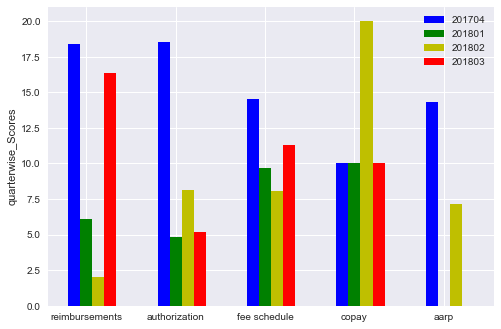

In [34]:
quarterwise_topics_routine(df1,topics1)

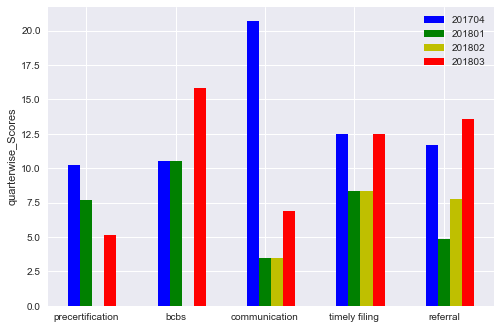

In [35]:
quarterwise_topics_routine(df2,topics2)

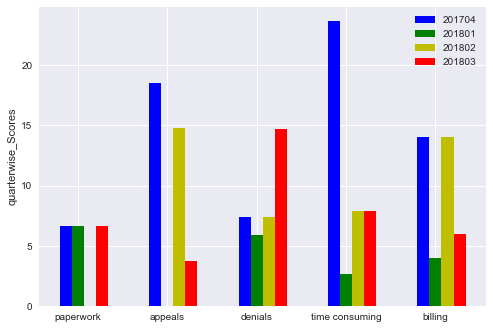

In [36]:
quarterwise_topics_routine(df3,topics3)

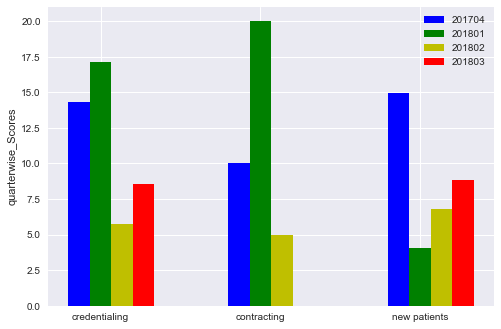

In [37]:
quarterwise_topics_routine(df4,topics4)

In [38]:
def hplan_analysis(df_,topics,hplans):
    hplan_map = {}
    for topic in topics:
        new_dt = df_[df_['bagofwords'].str.contains(topic)]
        topic_vals = []
        for h in hplans:
            dt_hwise = new_dt[new_dt['healthplan']==h]
            per_h = dt_hwise.shape[0]/new_dt.shape[0]
            topic_vals.append(per_h*100)
        hplan_map[topic] = topic_vals
    return hplan_map

hplan_analys = hplan_analysis(detract_df,priority_topics,health_plans)
df_hwise = pd.DataFrame(hplan_analys,index=list(health_plans),
                        columns=priority_topics)

df_hwiseT = df_hwise.T

hplans=list(health_plans)

df1_hplan = df_hwiseT.loc[topics1,:]
df2_hplan = df_hwiseT.loc[topics2,:]
df3_hplan = df_hwiseT.loc[topics3,:]
df4_hplan = df_hwiseT.loc[topics4,:]

In [39]:
df_hwiseT

,Neighborhood Health Partnership,Nevada - United HealthCare Insurance Company,Oxford CT,Oxford NJ,Oxford NY,United HealthCare Insurance Company - Connecticut,United HealthCare Insurance Company - Indiana,United HealthCare Insurance Company - Michigan,"United Healthcare of Texas, Inc. - Houston",UnitedHealthcare - Central Texas,...,UnitedHealthcare of Tennessee,UnitedHealthcare of Utah,UnitedHealthcare of Washington,UnitedHealthcare of Wisconsin,UnitedHealthcare of the Mid Atlantic,"UnitedHealthcare of the Midlands, Inc. (IA)","UnitedHealthcare of the Midlands, Inc. (NE)",UnitedHealthcare of the Midwest - Kansas City,"UnitedHealthcare of the Midwest, Inc. - St Louis",UnitedHealthcare of the River Valley
reimbursements,0.000000,0.000000,2.040816,0.000000,4.081633,0.000000,0.000000,0.000000,0.000000,2.040816,...,2.040816,0.000000,10.204082,0.000000,2.040816,2.040816,0.000000,6.122449,2.040816,4.081633
authorization,0.740741,0.000000,0.000000,0.370370,0.740741,1.851852,1.111111,3.333333,2.592593,1.851852,...,1.851852,1.481481,1.481481,3.703704,5.185185,2.962963,5.185185,3.333333,1.851852,1.111111
fee schedule,0.000000,0.000000,0.000000,1.612903,0.000000,1.612903,1.612903,3.225806,3.225806,1.612903,...,4.838710,0.000000,3.225806,0.000000,9.677419,3.225806,4.838710,1.612903,0.000000,4.838710
copay,5.000000,0.000000,0.000000,0.000000,5.000000,0.000000,10.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,10.000000,0.000000,0.000000,0.000000,0.000000,5.000000
aarp,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,7.142857,0.000000,0.000000,0.000000,7.142857,0.000000,0.000000,0.000000,0.000000,7.142857
precertification,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.564103,0.000000,5.128205,5.128205,...,0.000000,0.000000,0.000000,2.564103,2.564103,0.000000,2.564103,0.000000,10.256410,0.000000
bcbs,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.263158,...,0.000000,0.000000,0.000000,5.263158,0.000000,0.000000,10.526316,5.263158,0.000000,15.789474
communication,0.000000,0.000000,0.000000,0.000000,0.000000,3.448276,0.000000,6.896552,13.793103,0.000000,...,3.448276,3.448276,3.448276,0.000000,0.000000,3.448276,0.000000,0.000000,3.448276,6.896552
timely filing,8.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.833333,0.000000,0.000000,...,0.000000,4.166667,12.500000,0.000000,0.000000,0.000000,4.166667,12.500000,0.000000,0.000000
referral,0.000000,0.000000,0.970874,0.000000,0.970874,6.796117,0.000000,2.912621,4.854369,0.970874,...,0.970874,0.000000,3.883495,1.941748,3.883495,0.000000,0.970874,1.941748,2.912621,2.912621


In [41]:
#%%

def healthplanwise_topics_routine(DATAFRAME,TOPICS,HPLANS):
    N = len(DATAFRAME.index)
    ind = np.arange(N)*2  # the x locations for the groups
    width = 0.27       # the width of the bars
    
    fig = plt.figure()
    ax = fig.add_subplot(111)
    
    
    q6vals = list(DATAFRAME[HPLANS[0]])
    rects6 = ax.bar(ind,q6vals, width, color='b')

    q7vals = list(DATAFRAME[HPLANS[1]])
    rects7 = ax.bar(ind+width,q7vals, width, color='g')

    q8vals = list(DATAFRAME[HPLANS[2]])
    rects8 = ax.bar(ind+width*2,q8vals, width, color='y')
    
    q9vals = list(DATAFRAME[HPLANS[3]])
    rects9 = ax.bar(ind+width*3,q9vals, width, color='r')
    
    ax.set_ylabel('healthplanwise_Scores')
    ax.set_xticks(ind+width)
    ax.set_xticklabels(TOPICS)
    ax.legend( (rects6[0], rects7[0], rects8[0], rects9[0]), (HPLANS[0],HPLANS[1],HPLANS[2],HPLANS[3]) )
    
    plt.show() 

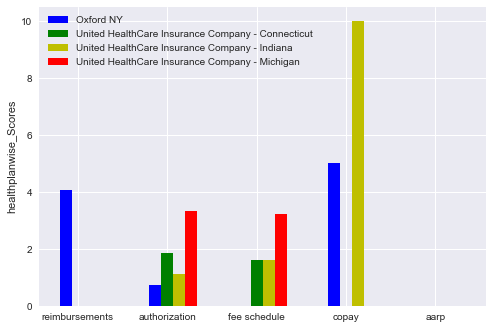

In [42]:
healthplanwise_topics_routine(df1_hplan,topics1,HPLANS = hplans[4:8])

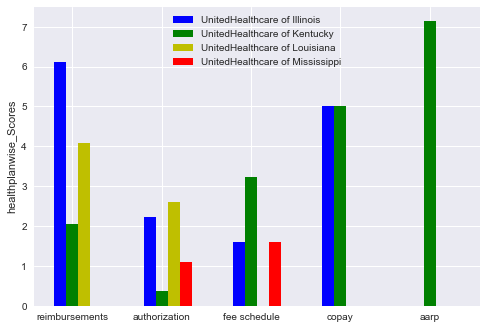

In [43]:
healthplanwise_topics_routine(df1_hplan,topics1,HPLANS = hplans[20:24])

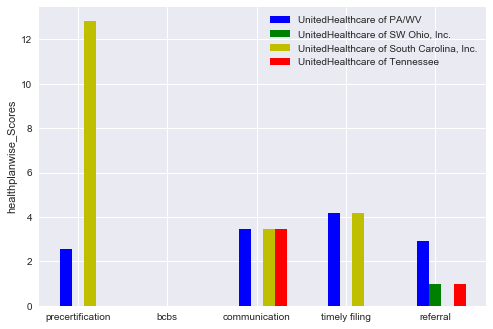

In [44]:
healthplanwise_topics_routine(df2_hplan,topics2,HPLANS = hplans[32:36])

In [45]:
#%%
from gensim.summarization import keywords
q1_corpus = '\n'.join(c for c in df_q1['bagofwords'])
q2_corpus = '\n'.join(c for c in df_q2['bagofwords'])
q3_corpus = '\n'.join(c for c in df_q3['bagofwords'])
q4_corpus = '\n'.join(c for c in df_q4['bagofwords'])
q5_corpus = '\n'.join(c for c in df_q5['bagofwords'])
q6_corpus = '\n'.join(c for c in df_q6['bagofwords'])
q7_corpus = '\n'.join(c for c in df_q7['bagofwords'])
q8_corpus = '\n'.join(c for c in df_q8['bagofwords'])

print (keywords(q1_corpus,words=50))
print ('\n')
print (keywords(q2_corpus,words=50))
print ('\n')
print (keywords(q3_corpus,words=50))
print ('\n')
print (keywords(q4_corpus,words=50))
print ('\n')
print (keywords(q5_corpus,words=50))
print ('\n')
print (keywords(q6_corpus,words=50))

patient
uhcs
unitedhealthcare
unitedhealthcares
uhc insurers
new patients
claim payment
provider
providers
provide
time
times
timely
timed
insurance
insurances
insured
insurer
claims denied
services
issue
issues
provided causes
working
work
worked
works
reimbursement
reimbursements
reimburse
reimburses
reimbursing
reimbursed
payments
customer service
plan
problem
difficult
care
caring
process
processing
pay
paying
pays
cause problems
practice
practices
needed
needs
need
easy
representative
representatives
year like plans
company contract
poor
medicare
contracts
contracting
contracted
stating processed
fee
fees
procedures
denial appeals
appeal denials
deal
dealing
companies state
causing
caused
authorized procedure
years
authorizations
authorization
rated
rate
rating
rates
requirements
requiring
require
help
helped
helping
helpful
coverage
deny
denies
numbers
number
stated
prior
priors
want
wants
person
personalized
persons
personally
getting
website
network


patient
uhcs
patients heal

In [46]:
from gensim.summarization.summarizer import summarize
detractors_corpus = '\n'.join(review for review in detract_df['cleaned'])
summary_detractors = summarize(detractors_corpus,word_count=500)

In [47]:
summary_detractors

'your reimbursements are the lowest  when contacting our local provider relation person it is like pulling teeth  prior authorizations for medication are frustrating  the doctor is no longer the patients care giver or advocate it the insurance company  they have the final word and your website is frustrating  why do you have to make another thing more difficult and time consuming  every insurance that we go to on your site we must use a login and password  that is the beauty of navinet which you no long participate with unless we pay for it\nwe have had a lot of issues with uhc in the last year  we have had authorizations being given for procedures but our claims being denied for invalid authorizations and we have to appeal  we have had our cpt codes adjusted and paid incorrectly  we are losing our banner uhc medicare advantage plan next year and no matter how many calls i have made we are getting no answers as to why we cant get the optum lifeprint contract  the only uhc product that 

In [48]:
def region_analysis(df_,topics):
    region_map = {}
    for topic in topics:
        new_data = df_[df_['bagofwords'].str.contains(topic)]
        central = new_data[new_data['region']=='Central']
        NE = new_data[new_data['region']=='Northeast']
        SE = new_data[new_data['region']=='Southeast']
        west = new_data[new_data['region']=='West']
        central_score = central.shape[0]/new_data.shape[0]
        NE_score = NE.shape[0]/new_data.shape[0]
        SE_score = SE.shape[0]/new_data.shape[0]
        west_score = west.shape[0]/new_data.shape[0]
        region_map[topic]=[central_score,NE_score,SE_score,west_score]
    return region_map


region_analys = region_analysis(detract_df,priority_topics)
regionwise_df = pd.DataFrame(region_analys,index=list(regions),
                             columns=priority_topics)
regionT = regionwise_df.T
regionT = regionT*100

df1_region = regionT.loc[topics1,:]
df2_region = regionT.loc[topics2,:]
df3_region = regionT.loc[topics3,:]
df4_region = regionT.loc[topics4,:]

In [49]:
regionT

,Central,Northeast,Southeast,West
reimbursements,28.571429,32.653061,20.408163,18.367347
authorization,41.481481,19.259259,21.111111,18.148148
fee schedule,38.709677,32.258065,24.193548,4.838710
copay,25.000000,40.000000,25.000000,10.000000
aarp,28.571429,28.571429,21.428571,21.428571
precertification,46.153846,10.256410,35.897436,7.692308
bcbs,52.631579,10.526316,36.842105,0.000000
communication,48.275862,17.241379,20.689655,13.793103
timely filing,45.833333,8.333333,25.000000,20.833333
referral,33.980583,33.009709,17.475728,15.533981


In [50]:
df1_region

,Central,Northeast,Southeast,West
reimbursements,28.571429,32.653061,20.408163,18.367347
authorization,41.481481,19.259259,21.111111,18.148148
fee schedule,38.709677,32.258065,24.193548,4.838710
copay,25.000000,40.000000,25.000000,10.000000
aarp,28.571429,28.571429,21.428571,21.428571


In [51]:
df2_region

,Central,Northeast,Southeast,West
precertification,46.153846,10.256410,35.897436,7.692308
bcbs,52.631579,10.526316,36.842105,0.000000
communication,48.275862,17.241379,20.689655,13.793103
timely filing,45.833333,8.333333,25.000000,20.833333
referral,33.980583,33.009709,17.475728,15.533981


In [52]:
df3_region

,Central,Northeast,Southeast,West
paperwork,60.000000,13.333333,6.666667,20.000000
appeals,55.555556,11.111111,18.518519,14.814815
denials,39.705882,5.882353,23.529412,30.882353
time consuming,42.105263,10.526316,26.315789,21.052632
billing,48.000000,12.000000,16.000000,24.000000


In [53]:
df4_region

,Central,Northeast,Southeast,West
credentialing,37.142857,17.142857,20.000000,25.714286
contracting,35.000000,5.000000,25.000000,35.000000
new patients,41.496599,19.047619,21.768707,17.687075


In [54]:
def regionwisewise_topics_routine(DATAFRAME,TOPICS,REGIONS):
    N = len(DATAFRAME.index)
    ind = np.arange(N)*2  # the x locations for the groups
    width = 0.27       # the width of the bars
    
    fig = plt.figure()
    ax = fig.add_subplot(111)
    
    
    q6vals = list(DATAFRAME[REGIONS[0]])
    rects6 = ax.bar(ind,q6vals, width, color='b')

    q7vals = list(DATAFRAME[REGIONS[1]])
    rects7 = ax.bar(ind+width,q7vals, width, color='g')

    q8vals = list(DATAFRAME[REGIONS[2]])
    rects8 = ax.bar(ind+width*2,q8vals, width, color='y')
    
    q9vals = list(DATAFRAME[REGIONS[3]])
    rects9 = ax.bar(ind+width*3,q9vals, width, color='r')
    
    ax.set_ylabel('Regionwise_Scores')
    ax.set_xticks(ind+width)
    ax.set_xticklabels(TOPICS)
    ax.legend( (rects6[0], rects7[0], rects8[0], rects9[0]), (REGIONS[0],REGIONS[1],REGIONS[2],REGIONS[3]) )
    
    plt.show() 

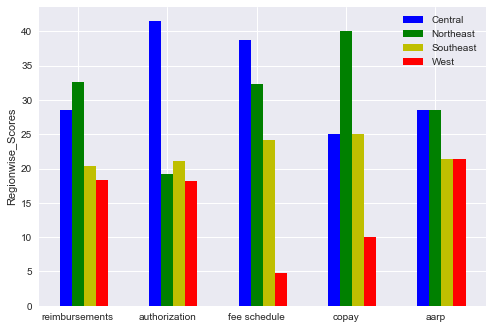

In [55]:
regionwisewise_topics_routine(df1_region,topics1,regions)

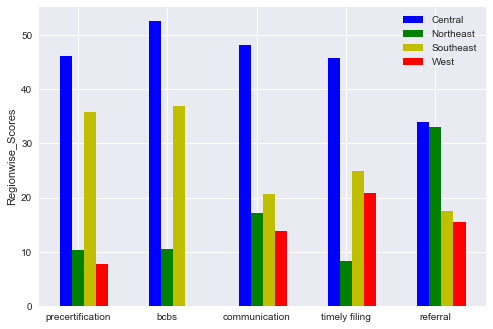

In [56]:
regionwisewise_topics_routine(df2_region,topics2,regions)

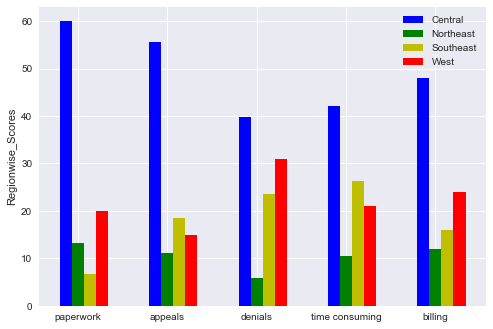

In [57]:
regionwisewise_topics_routine(df3_region,topics3,regions)

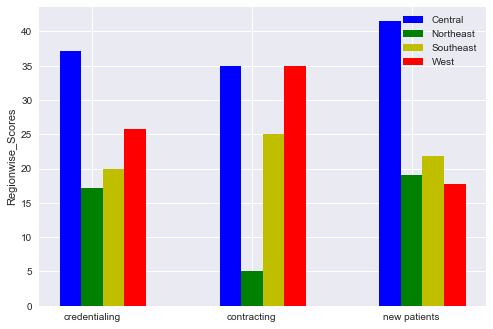

In [58]:
regionwisewise_topics_routine(df4_region,topics4,regions)

1. TF-IDF based sorting of words/tokens.
      Using tf-idf vectorizer for the same.
      Sorting the tf-idf scores and then selecting the top n words.
      n is user defined

In [59]:
print ("tf-idf vectorizer analysis....")

tfidf = TfidfVectorizer(max_features=1000, lowercase=True, analyzer='word',
                        stop_words= 'english',ngram_range=(1,1))
sklearn_tfidf = TfidfVectorizer(norm='l2', min_df=0, use_idf=True, smooth_idf=False, sublinear_tf=False)
tfidf_set = sklearn_tfidf.fit_transform(detract_df['bagofwords'].values)

feature_array = np.array(sklearn_tfidf.get_feature_names())
tfidf_sorting = np.argsort(tfidf_set.toarray()).flatten()[::-1]

n = 50

top_nwords = feature_array[tfidf_sorting][:n]

tf-idf vectorizer analysis....


In [60]:
top_nwords

array(['referral', 'want', 'process', 'low', 'new', 'reimbursement',
       'difficult', 'uhc', 'patients', 'faculty', 'explain', 'expertise',
       'expert', 'experimental', 'experiencing', 'faith', 'experiences',
       'experienced', 'experience', 'expensive', 'fall', 'expenses',
       'expense', 'expedited', 'expecting', 'expected', 'expectations',
       'expectation', 'expect', 'expand', 'existing', 'existent',
       'fallen', 'existence', 'expire', 'explained', 'factors', 'fairly',
       'fail', 'factor', 'fact', 'facing', 'facility', 'facilities',
       'faced', 'face', 'fa', 'eye', 'extremely', 'extreme'], dtype='<U24')

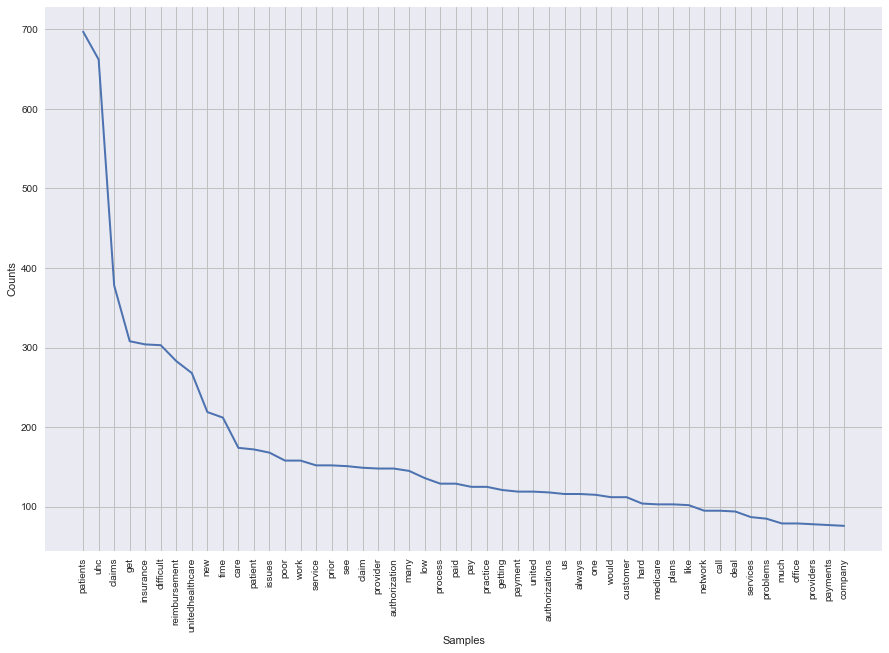

In [61]:
doc_corpus = " ".join(doc for doc in detract_df['bagofwords'])
%matplotlib inline

sns.set(rc = {'figure.figsize':(15,10)})
sns.set_style('darkgrid')

tokens = word_tokenize(doc_corpus)
nlp_words = nltk.FreqDist(tokens)
nlp_words.plot(50)

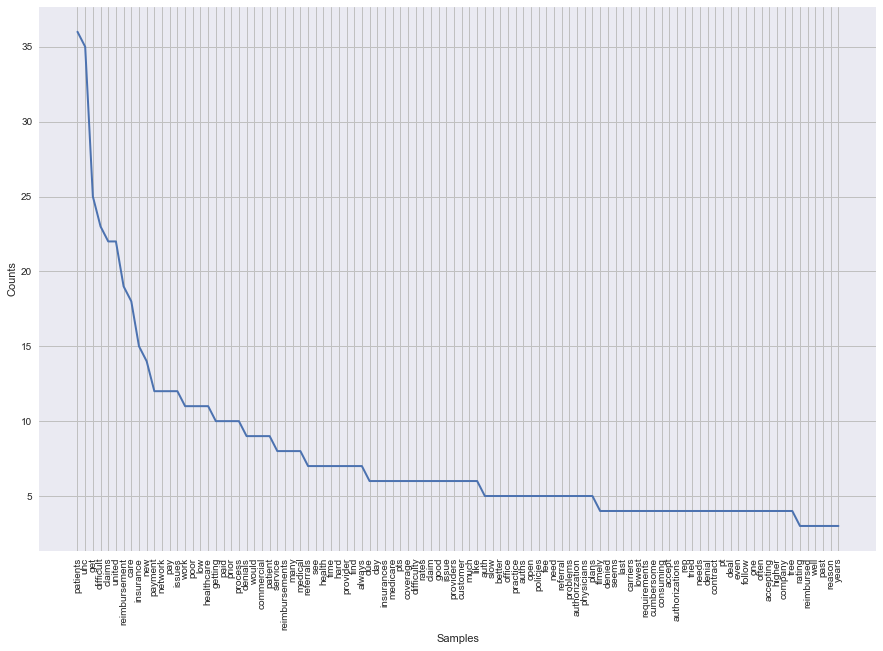

In [62]:
words_nlp = nltk.FreqDist(tokens[25000:])
words_nlp.plot(100)

In [63]:
sums = tfidf_set.sum(axis=0)
df_terms = []
for col, term in enumerate(feature_array):
    df_terms.append( (term, sums[0,col] ))

ranking = pd.DataFrame(df_terms, columns=['term','rank'])
ranking.sort_values('rank',inplace=True, ascending=False)
ranking.reset_index(drop=True,inplace=True)

In [64]:
ranking.shape

(3603, 2)

In [65]:
ranking.loc[1000:2000,:]

,term,rank
1000,uniteds,1.147938
1001,universal,1.147373
1002,precertifications,1.146980
1003,update,1.146651
1004,comparison,1.146222
1005,source,1.145185
1006,middle,1.144486
1007,everyone,1.140721
1008,bit,1.140132
1009,appreciate,1.139678
